## ONLINE RETAIL SYSTEM EDA (Exploratory Data Analysis)


## Reading the Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')  # adjust encoding if needed


In [3]:
print("Shape:", df.shape)
df.head()


Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


### Missing Values and Data Types

In [4]:
df.info()
df.isnull().sum()
df.isnull().mean() * 100  # percent missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Summary Statistics

In [5]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Unique values

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
Quantity: 722 unique values
InvoiceDate: 23260 unique values
UnitPrice: 1630 unique values
CustomerID: 4372 unique values
Country: 38 unique values


In [8]:
df[~df['InvoiceDate'].apply(lambda x: isinstance(x, str))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [9]:
df['InvoiceDate'].sample(10)


381770    06-10-2011 15:51
276747    24-07-2011 15:46
211681    02-06-2011 17:26
97965     22-02-2011 14:10
172809    03-05-2011 10:49
263509    14-07-2011 12:48
22306     09-12-2010 17:27
199679    22-05-2011 13:01
334056    11-09-2011 10:35
476146    17-11-2011 11:29
Name: InvoiceDate, dtype: object

## VISUALIZATIONS

In [12]:
# Convert InvoiceDate column to datetime (day first format)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)


In [13]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [14]:
df_clean = df.dropna(subset=['CustomerID'])
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]


### Feature Distribution

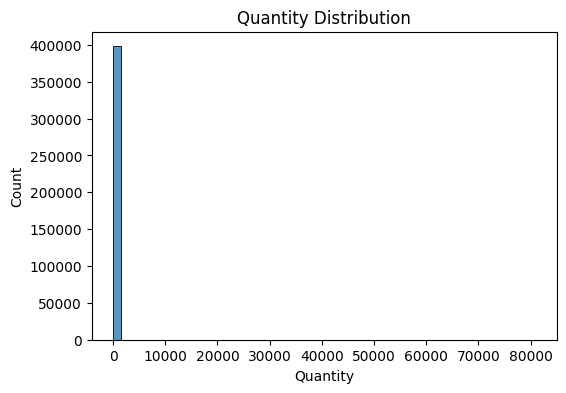

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['Quantity'], bins=50)
plt.title("Quantity Distribution")
plt.show()


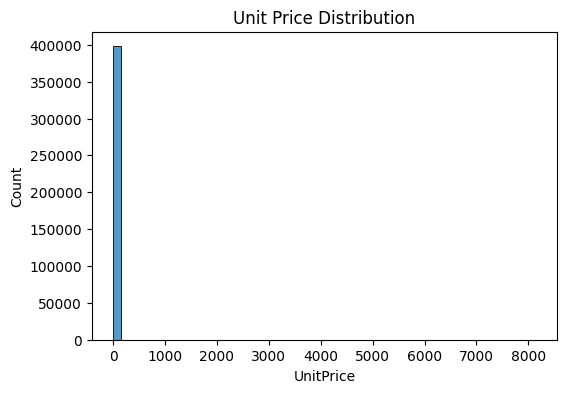

In [16]:
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['UnitPrice'], bins=50)
plt.title("Unit Price Distribution")
plt.show()


### Outliers

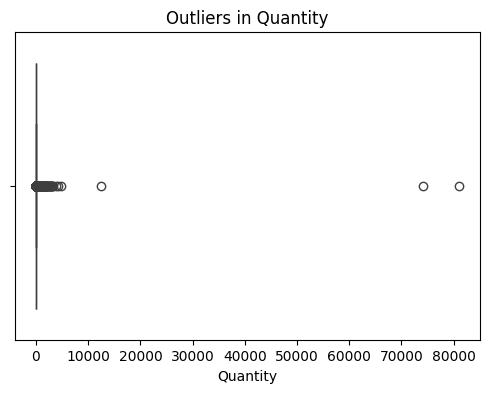

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['Quantity'])
plt.title("Outliers in Quantity")
plt.show()


### Trend Analysis

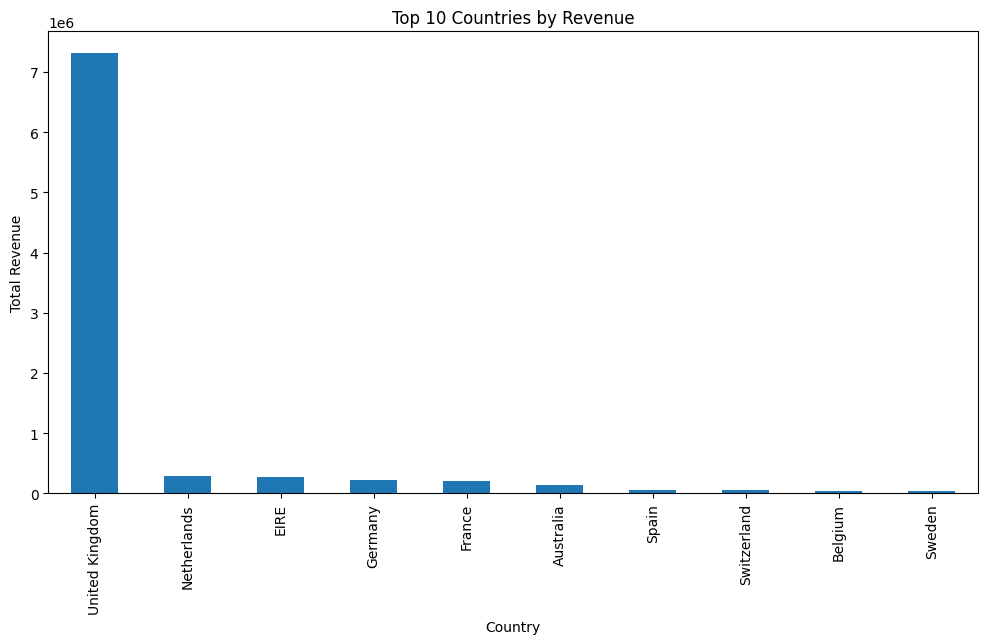

In [18]:
country_rev = df_clean.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_rev[:10].plot(kind='bar')
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Revenue")
plt.show()


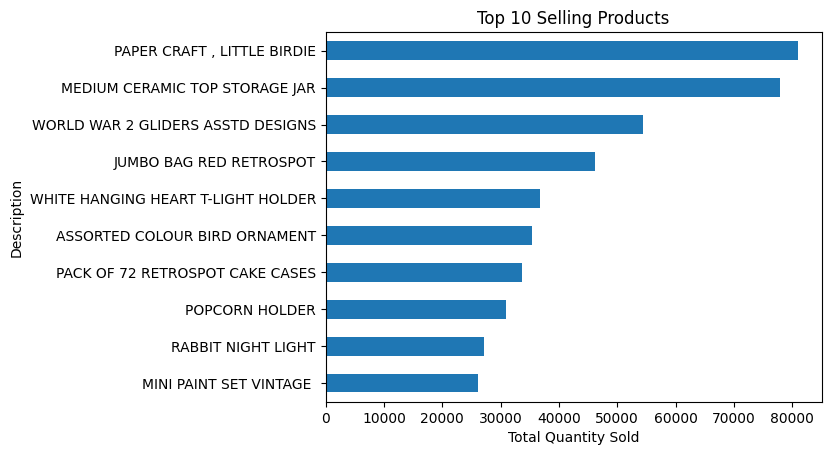

In [19]:
top_products = df_clean.groupby("Description")['Quantity'].sum().sort_values(ascending=False)[:10]
top_products.plot(kind='barh')
plt.title("Top 10 Selling Products")
plt.xlabel("Total Quantity Sold")
plt.gca().invert_yaxis()
plt.show()


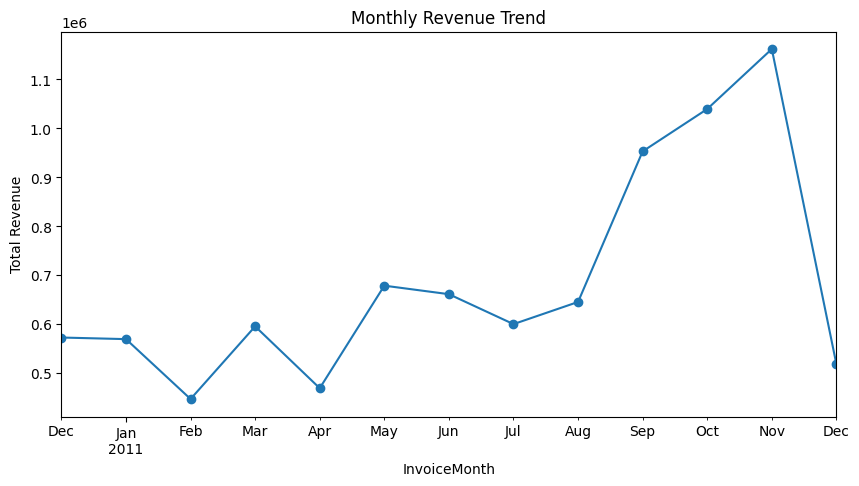

In [20]:
df_clean['InvoiceMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_sales.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Total Revenue")
plt.show()


### Correlational Analysis

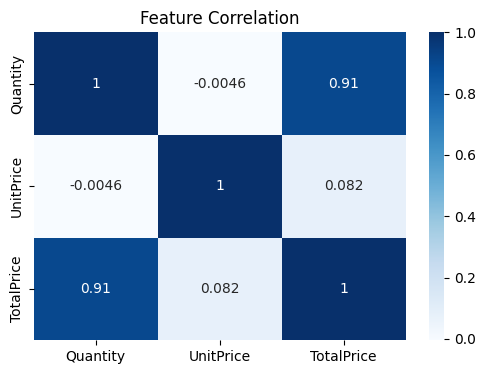

In [21]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation")
plt.show()


### Grouped Aggregations

In [22]:
invoice_stats = df_clean.groupby('InvoiceNo').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum'
}).rename(columns={'TotalPrice': 'InvoiceTotal', 'Quantity': 'ItemsPerInvoice'})

invoice_stats.describe()


,InvoiceTotal,ItemsPerInvoice
count,18536.000000,18536.000000
mean,480.762187,279.547691
std,1678.029352,976.796524
min,0.000000,1.000000
25%,157.930000,74.000000
50%,303.020000,155.000000
75%,471.660000,291.000000
max,168469.600000,80995.000000


In [23]:
from scipy.stats import zscore
df_z = df_clean[['Quantity', 'UnitPrice', 'TotalPrice']].apply(zscore)
outliers = ((df_z > 3) | (df_z < -3)).sum()
print("Outliers detected:\n", outliers)


Outliers detected:
 Quantity      388
UnitPrice     221
TotalPrice    344
dtype: int64


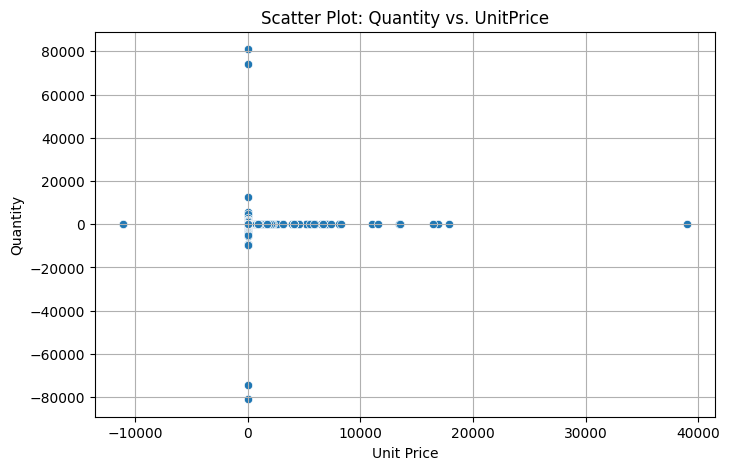

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity')
plt.title('Scatter Plot: Quantity vs. UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.grid(True)
plt.show()

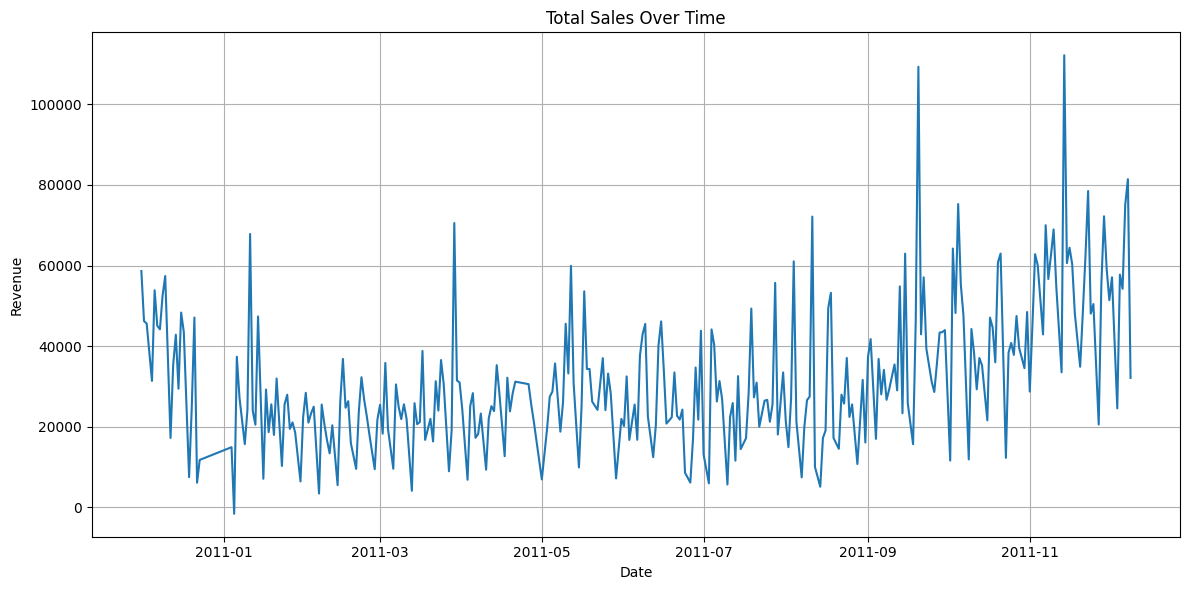

In [27]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title("Total Sales Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


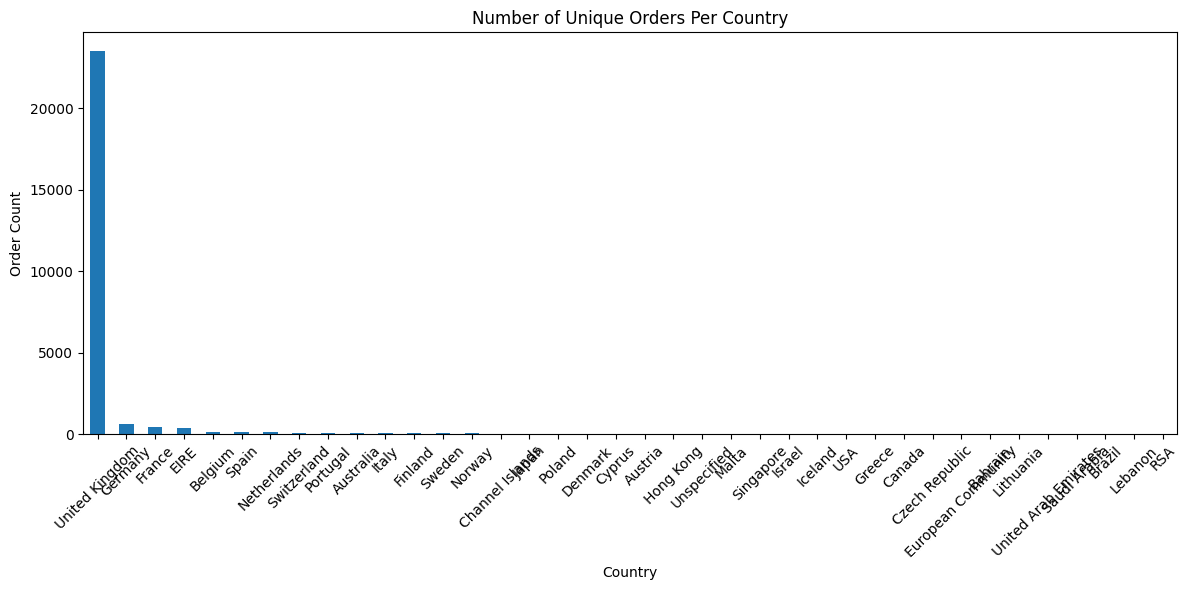

In [28]:
orders_per_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
orders_per_country.plot(kind='bar')
plt.title("Number of Unique Orders Per Country")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pairwise Feature Relationship

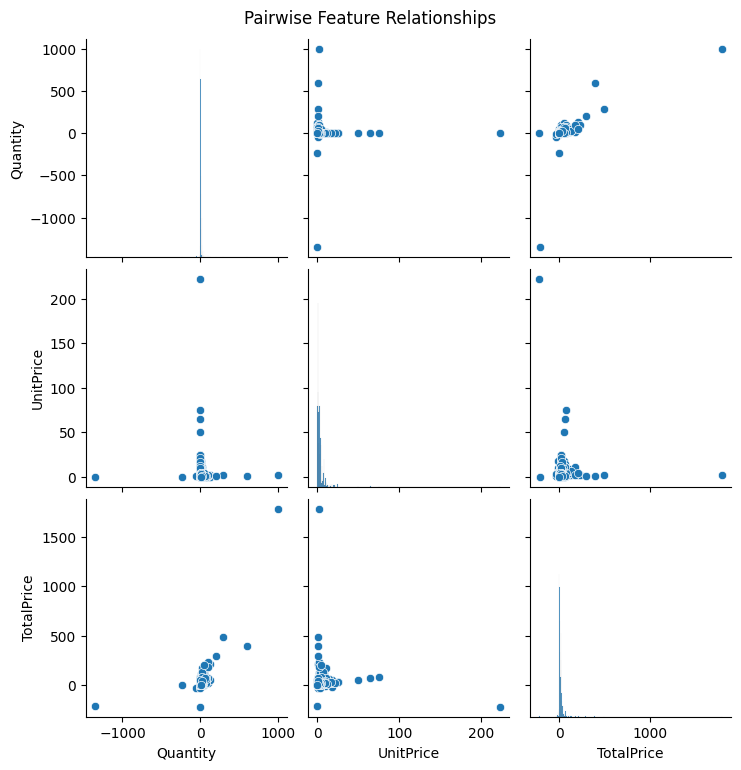

In [30]:
sample_df = df[['Quantity', 'UnitPrice', 'TotalPrice']].sample(1000, random_state=42)

sns.pairplot(sample_df)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


### Other Relevant Analysis

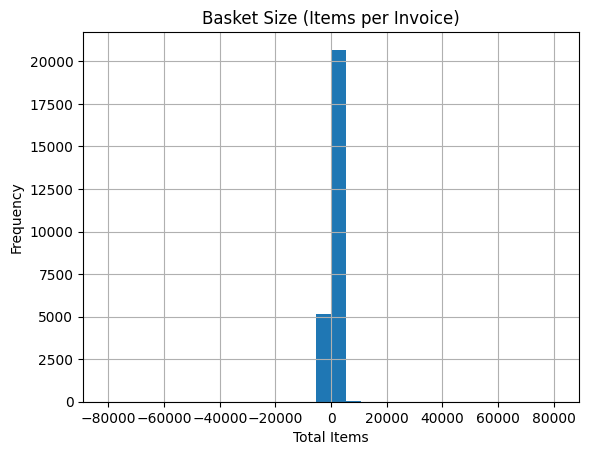

In [31]:
invoice_stats = df.groupby('InvoiceNo')['Quantity'].sum()
invoice_stats.plot.hist(bins=30)
plt.title("Basket Size (Items per Invoice)")
plt.xlabel("Total Items")
plt.grid(True)
plt.show()


Total Canceled Orders: 3836


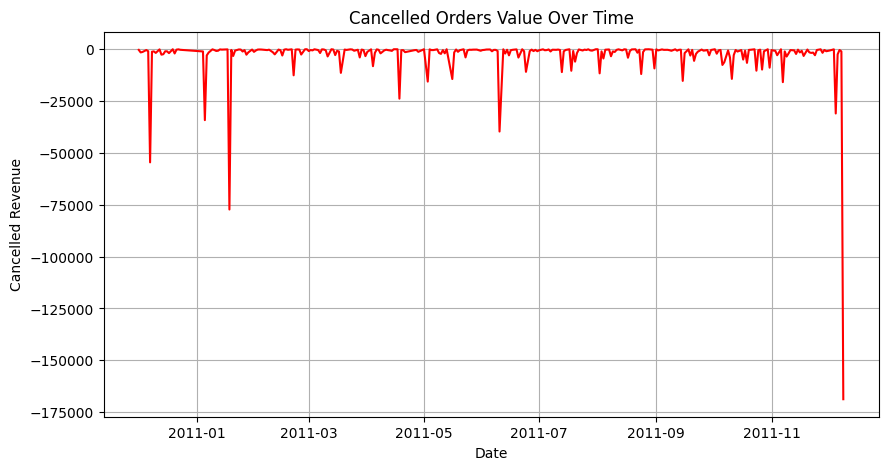

In [32]:
cancelled = df[df['InvoiceNo'].astype(str).str.startswith('C')]
print("Total Canceled Orders:", cancelled['InvoiceNo'].nunique())

# Plot cancelled orders over time
cancelled['InvoiceDate'] = pd.to_datetime(cancelled['InvoiceDate'], dayfirst=True)
cancelled['Date'] = cancelled['InvoiceDate'].dt.date
cancel_trend = cancelled.groupby('Date')['TotalPrice'].sum()

cancel_trend.plot(figsize=(10, 5), color='red')
plt.title("Cancelled Orders Value Over Time")
plt.ylabel("Cancelled Revenue")
plt.xlabel("Date")
plt.grid(True)
plt.show()


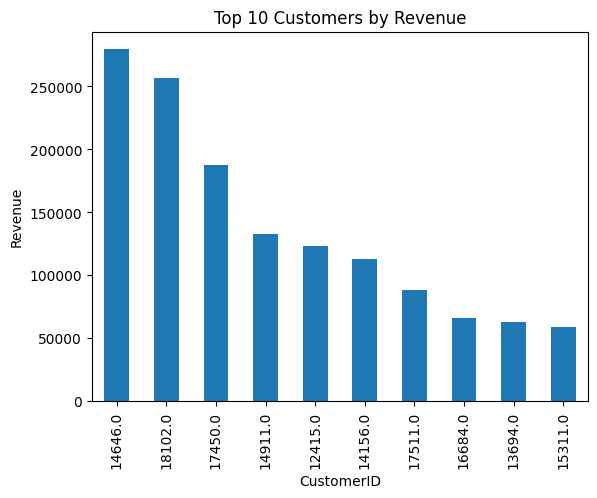

In [33]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()


## Missing Vales Analysis plot 

In [35]:
# Total missing values per column
missing_counts = df.isnull().sum()

# Percentage of missing values
missing_percent = (missing_counts / len(df)) * 100

# Combine into one table
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percent
})

# Filter only columns with missing values
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Display
print("Missing Value Summary:")
missing_df


Missing Value Summary:


,Missing Values,Percentage (%)
Description,1454,0.268311
CustomerID,135080,24.926694


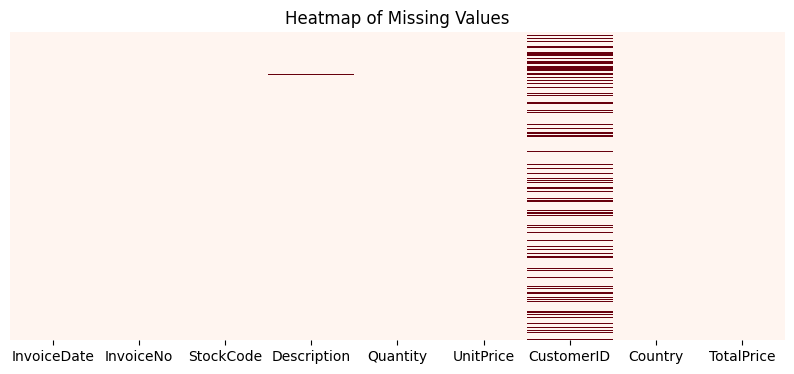

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='Reds')
plt.title("Heatmap of Missing Values")
plt.show()


In [41]:
print("\nUnique Values in Each Column:\n")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")



Unique Values in Each Column:

InvoiceDate: 23260 unique values
InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
Quantity: 722 unique values
UnitPrice: 1630 unique values
CustomerID: 4372 unique values
Country: 38 unique values
TotalPrice: 6204 unique values


In [37]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df[['Quantity', 'UnitPrice', 'TotalPrice']].apply(zscore)

# Mark entries where any Z-score > 3 or < -3
outliers_z = (z_scores.abs() > 3).any(axis=1)

# Count outliers
print("Number of outliers (Z-score):", outliers_z.sum())

# Preview outliers
df[outliers_z].head()


Number of outliers (Z-score): 912


,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
870,2010-12-01 12:27:00,536477,21137,BLACK RECORD COVER FRAME,480,3.39,16210.0,United Kingdom,1627.20
1814,2010-12-01 14:32:00,536544,DOT,DOTCOM POSTAGE,1,569.77,NaN,United Kingdom,569.77
3041,2010-12-01 17:06:00,536592,DOT,DOTCOM POSTAGE,1,607.49,NaN,United Kingdom,607.49
4287,2010-12-02 14:23:00,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,0.03,15838.0,United Kingdom,-280.80
4505,2010-12-02 15:22:00,536785,22423,REGENCY CAKESTAND 3 TIER,144,10.95,15061.0,United Kingdom,1576.80


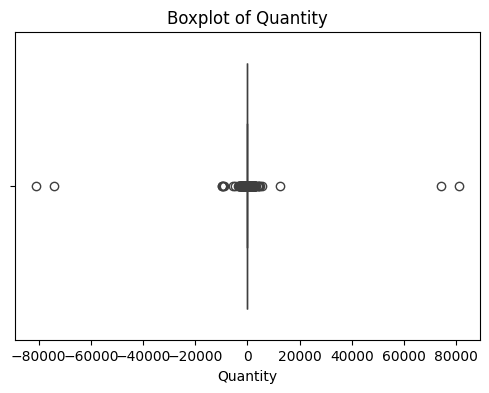

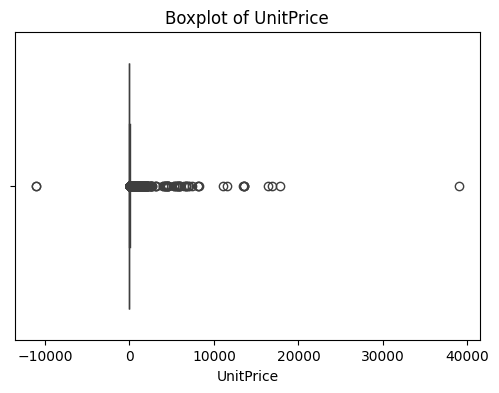

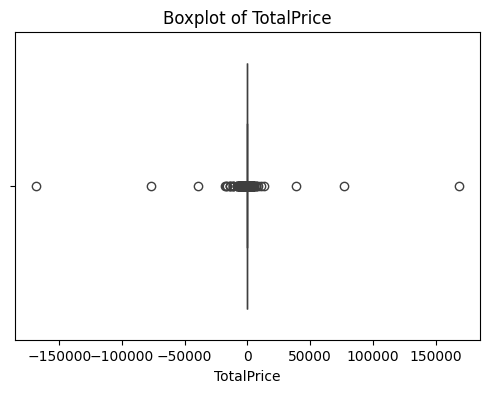

In [38]:
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [40]:
# Check data types
print("Column Data Types:\n")
print(df.dtypes)


Column Data Types:

InvoiceDate    datetime64[ns]
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
dtype: object


In [43]:
import datetime as dt

# Reference date = one day after the last invoice
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm.describe()


,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,5.075480,1898.459701
std,1722.390705,100.765435,9.338754,8219.345141
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,293.362500
50%,15300.500000,50.000000,3.000000,648.075000
75%,16778.250000,143.000000,5.000000,1611.725000
max,18287.000000,374.000000,248.000000,279489.020000


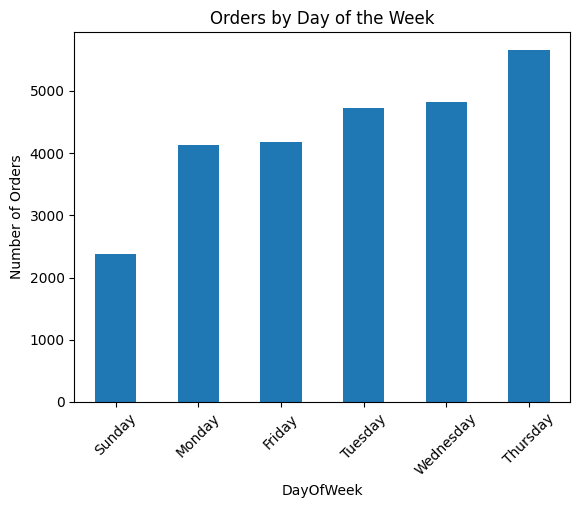

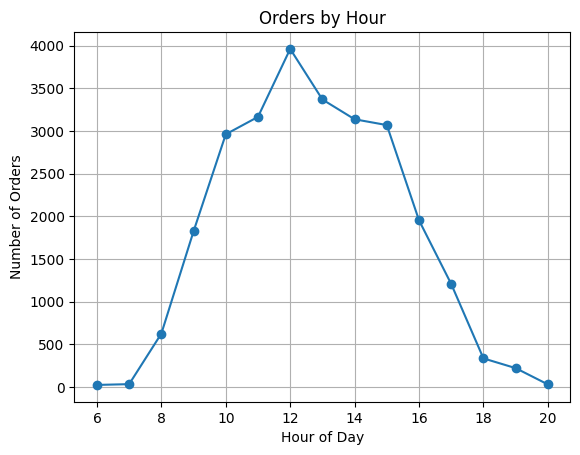

In [44]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour

# Orders by weekday
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
orders_by_day = df.groupby('DayOfWeek')['InvoiceNo'].nunique().sort_values()

orders_by_day.plot(kind='bar')
plt.title("Orders by Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

# Orders by hour
orders_by_hour = df.groupby('Hour')['InvoiceNo'].nunique()
orders_by_hour.plot(kind='line', marker='o')
plt.title("Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


## DATA PREPROCESSING

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')


In [3]:
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

df = df.dropna(subset=['CustomerID', 'Description'])
print("After removing missing values:", df.shape)

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print(df[['Quantity', 'UnitPrice', 'TotalPrice']].head())

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
print(df[['InvoiceDate', 'Year', 'Month', 'Day']].head())

df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("After removing cancelled invoices:", df.shape)

print("Data types after conversion:")
print(df.dtypes)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['Country'])
print("Encoded 'Country':")
print(df[['Country', 'Country_encoded']].head())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Quantity_scaled', 'UnitPrice_scaled']] = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
print(df[['Quantity', 'UnitPrice', 'Quantity_scaled', 'UnitPrice_scaled']].head())


After removing duplicates: (536641, 8)
After removing missing values: (401604, 8)
   Quantity  UnitPrice  TotalPrice
0         6       2.55       15.30
1         6       3.39       20.34
2         8       2.75       22.00
3         6       3.39       20.34
4         6       3.39       20.34
          InvoiceDate  Year  Month  Day
0 2010-12-01 08:26:00  2010     12    1
1 2010-12-01 08:26:00  2010     12    1
2 2010-12-01 08:26:00  2010     12    1
3 2010-12-01 08:26:00  2010     12    1
4 2010-12-01 08:26:00  2010     12    1
After removing cancelled invoices: (392732, 12)
Data types after conversion:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
Year                    int32
Month                   int32
Day                     int32
dtype: object
Encoded 'Country'

In [4]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['Quantity', 'UnitPrice', 'Country_encoded', 'Month']]  # Add or change as needed
y = df['TotalPrice']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (314185, 4)
Test shape: (78547, 4)


 ## K-Means Clustering (Unsupervised Learning)__ML Model

In [5]:
import pandas as pd
import numpy as np
import datetime as dt

# Define reference date as one day after the last transaction
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM per Customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'      # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


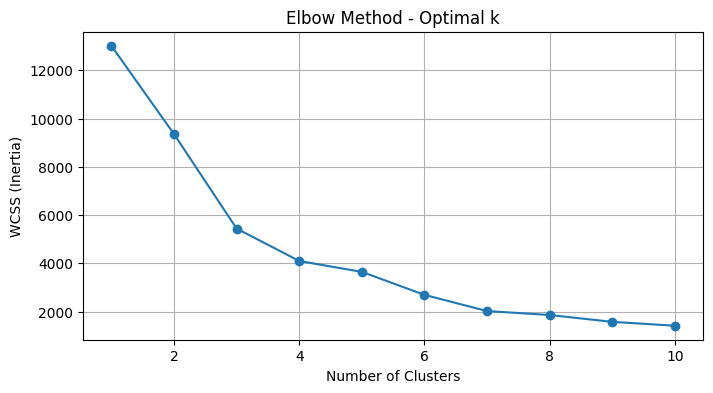

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()


In [8]:
# Let's assume optimal k = 4 (you can change this based on elbow result)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,0
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


### Silhoute Score
A score closer to 1 means well-separated clusters (good), closer to 0 means overlap (not good).



In [9]:
from sklearn.metrics import silhouette_score

score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.62


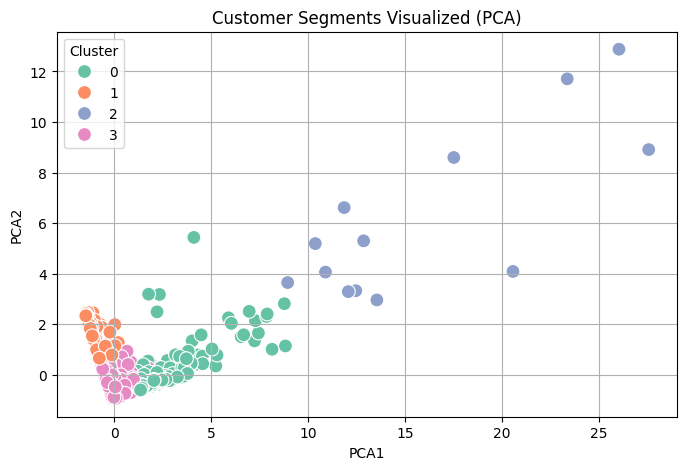

In [10]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Visualized (PCA)")
plt.grid(True)
plt.show()
